In [45]:
#Importando as bibliotecas que serao utilizadas durante o projeto
import pandas as pd

In [47]:
import seaborn as sns

In [48]:
import matplotlib.pyplot as plt

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [53]:
#Importando o dataset 
dataset = pd.read_csv("Life Expectancy Data.csv")

In [55]:
#Visuaizando informacoes sobre o dataset
dataset.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [57]:
print(dataset.head())
print(dataset.info())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [59]:
print(dataset.count())

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64


In [61]:
print(dataset['Country'].nunique())

193


In [63]:
print(dataset['Status'].nunique())

2


In [65]:
print(dataset['Schooling'].nunique())

173


In [67]:
print(dataset.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [69]:
#Realizando a limpeza dos dados
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

In [71]:
dataset = pd.get_dummies(dataset, drop_first=True)

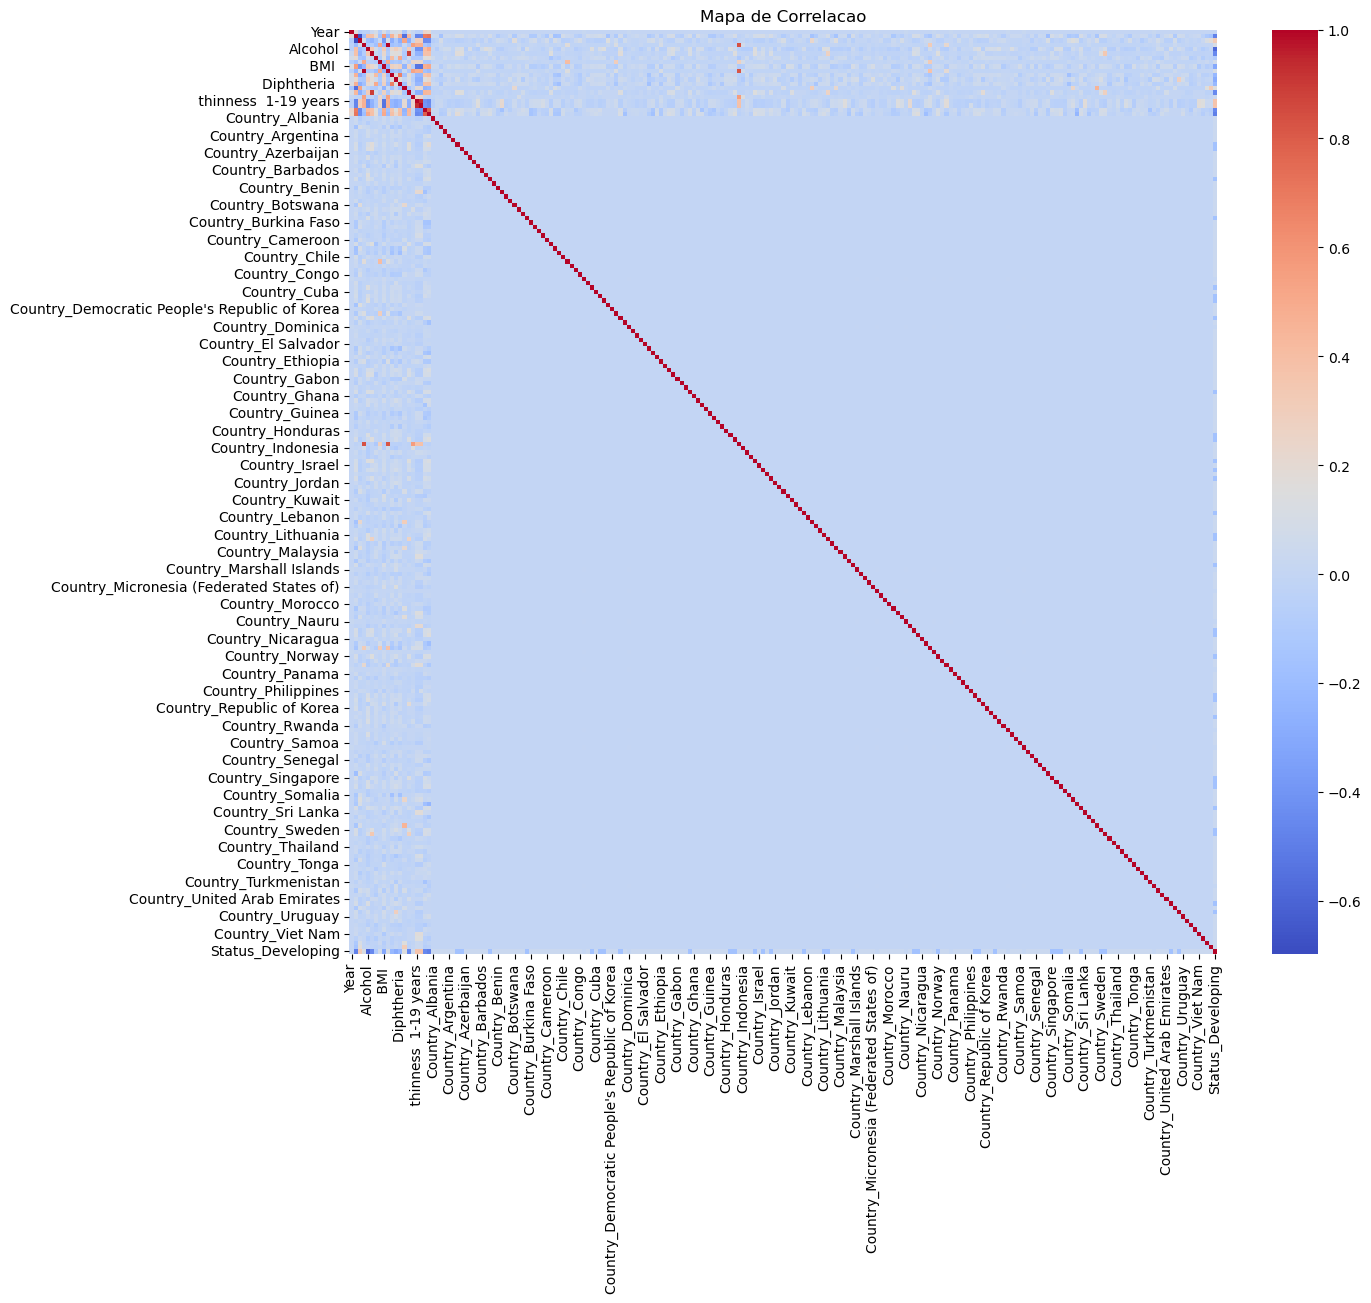

In [73]:
#Analise Exploratoria dos dados
plt.figure(figsize=(14,12))
sns.heatmap(dataset.corr(), cmap = "coolwarm")
plt.title("Mapa de Correlacao")
plt.show()

In [75]:
#Preparacao dos dados
X = dataset.drop('Life expectancy ', axis = 1)

In [76]:
Y = dataset['Life expectancy ']

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 45)

In [82]:
#Treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [84]:
Y_prev = modelo.predict(X_test)

In [86]:
#Avaliacao do modelo
print('R2 Score: ', r2_score(Y_test,Y_prev))
print('RMSE: ', root_mean_squared_error(Y_test, Y_prev))

R2 Score:  0.9464407273725142
RMSE:  2.0954621949175296


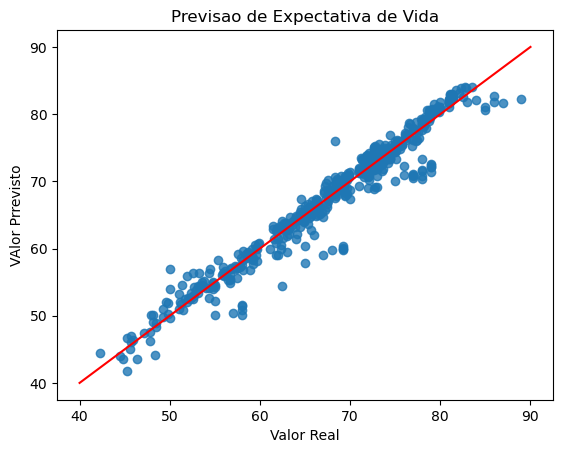

In [88]:
#Visualizacao dos resultados

plt.scatter(Y_test, Y_prev, alpha=0.8)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Previsao de Expectativa de Vida')
plt.plot([40,90],[40,90], color = 'red')
plt.show()